In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:\\Users\\Hp\\Downloads\\Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 5)

In [8]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

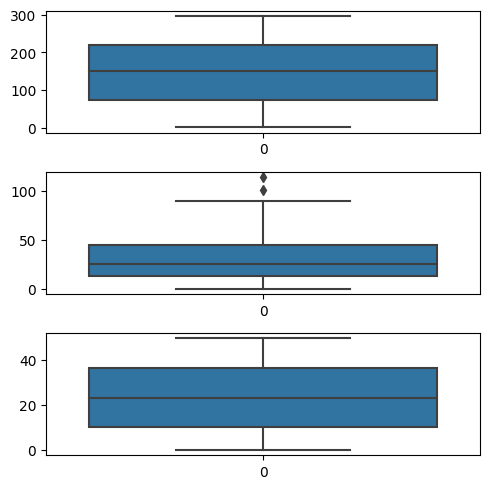

In [14]:
fig,axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

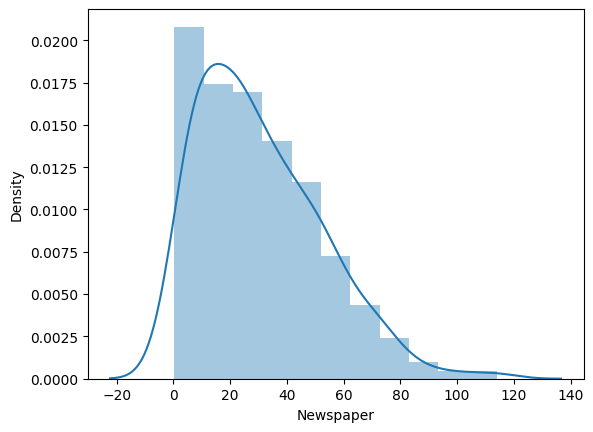

In [15]:
sns.distplot(df['Newspaper'])

In [16]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [22]:
lower_bright = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bright = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bright)
print(upper_bright)

-35.775000000000006
93.625


In [23]:
data = df.copy()

In [24]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<AxesSubplot: >

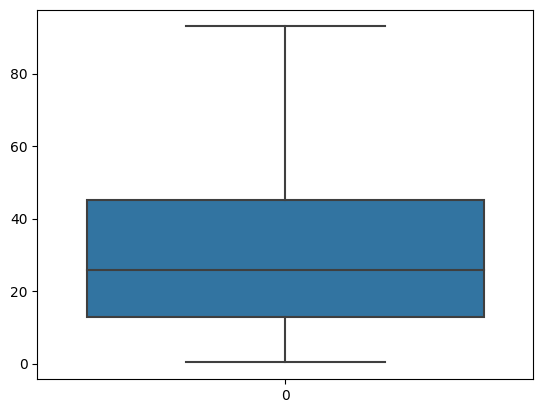

In [25]:
sns.boxplot(data['Newspaper'])

<AxesSubplot: >

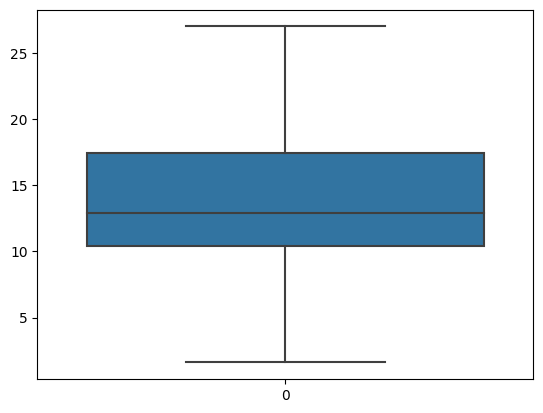

In [26]:
sns.boxplot(data['Sales'])

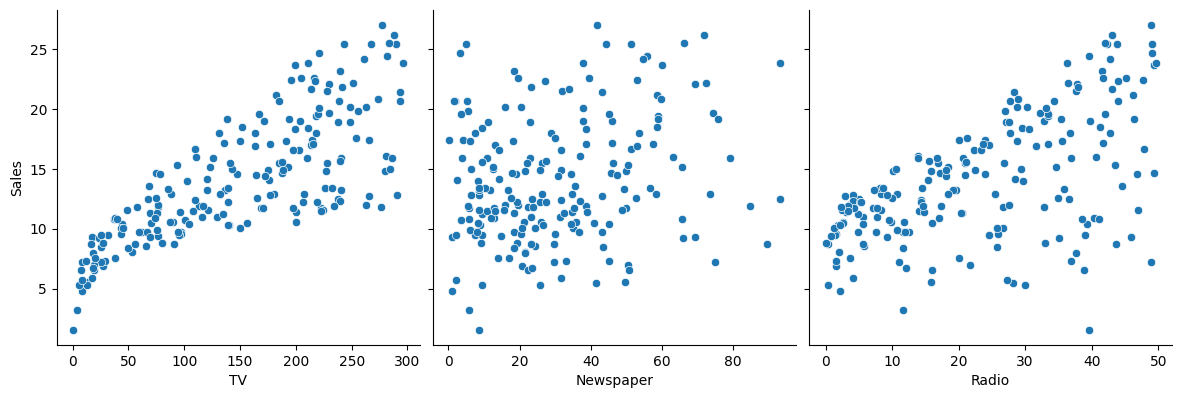

In [27]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales',height=4,aspect=1 , kind='scatter')
plt.show()

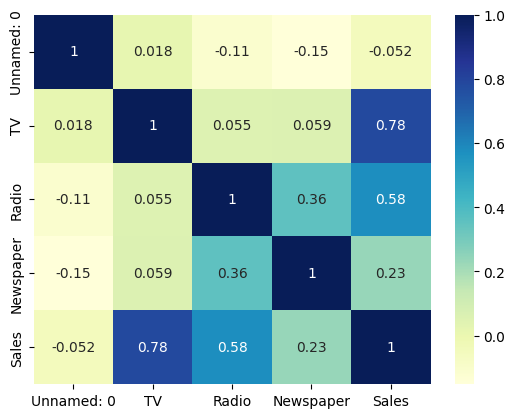

In [31]:
sns.heatmap(data.corr(),cmap='YlGnBu', annot=True)
plt.show()

In [35]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [36]:
print(important_features)

['TV', 'Radio', 'Sales']


In [37]:
x = data['TV']
y = data['Sales']

In [38]:
x = x.values.reshape(-1,1)

In [39]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [40]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [41]:
print(x.shape,y.shape)

(200, 1) (200,)


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [43]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [45]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [48]:
knn_train_pred = knn.predict(x_train)

In [49]:
knn_test_pred = knn.predict(x_test)

In [50]:
print(knn_train_pred, knn_test_pred)

[17.54 15.38 10.6  20.62 17.92 18.2   7.18 14.58 16.18 15.78 13.4  11.34
 20.66 13.7  16.18 10.36 16.32  4.54 10.62 13.4  21.36 20.58 14.92  9.98
 17.3   8.2  15.9  17.54 20.98 21.3  17.54 20.16 13.58 18.2  17.2  18.54
 21.3   4.54 20.82 15.28 17.54 18.54 15.78  8.2  20.76 11.34  7.18  9.98
 17.3  10.36 14.26  7.72 20.82 17.3  17.18  7.5  13.84  7.18 10.94 17.64
 16.18 17.54 13.56 10.94  7.72 14.8  13.56 17.3   4.54 16.76 16.18 15.1
 17.2  21.08 16.28 17.3   8.2  16.32 21.38 21.36 16.28 11.46 13.56 12.48
  9.8  17.54 13.4  10.38 14.92 12.7  21.38 13.74 16.64 16.94 10.2  16.76
 11.22 20.44 10.6  16.18 16.34 18.2   9.8   8.2  12.94 11.46 12.94 16.32
 21.22 20.62 11.22 20.82 21.22 10.06 16.18  4.54 11.14 10.62  8.2   9.8
  9.98 13.74  7.38 10.6  10.2  16.32  7.18 11.46 14.78  7.72 20.06 16.64
 18.2  16.12] [11.34  8.26 16.18 10.6  11.14 20.66 20.06 11.34 11.1  13.74  4.54 10.6
 20.16 17.66 15.84 14.88 13.84 14.3  13.02 17.48 17.3  15.34 15.9  21.7
 11.14  4.54 17.72 15.32 10.6  20.76 20.5

In [53]:
Results = pd.DataFrame(columns=['Model','Train R2','Test R2','Test RMSE','Variance'])

In [56]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: 0.4597817370391013
RMSE: 3.278858818478641


In [57]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.667905,0.459782,3.278859,0.208123


In [58]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [60]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [61]:
print(svr_train_pred,svr_test_pred)

[15.59969884 14.83435572 10.87740539 20.32259728 16.25487685 19.00042626
  8.45519067 18.28727662 16.48329147 15.14280356 13.44111375 11.75932694
 19.86588721 13.7207979  18.52383981  9.34146262 14.5438405   8.26200976
 11.05546034 13.41003795 19.23882174 17.5948621  14.77690568  9.76293842
 17.20113205  8.65158104 13.24547349 15.59969884 20.27655711 20.22946121
 15.77556995 17.46601262 12.57805894 19.00042626 17.92477929 16.39796419
 20.24626399  8.27966581 20.17222717 14.60353366 20.17129699 16.39796419
 15.14280356  8.59992966 17.68955747 11.8007418   8.45060788  9.9573743
 20.10009828  9.35047661 16.8293878   8.40351625 20.18718717 20.10541875
 15.46324814  8.3340531  13.34834463  8.43496055 11.66294437 16.7221808
 18.42878636 20.19901483 12.71861259 11.67560633  8.39757367 14.1198384
 12.68909608 20.06117813  8.27516859 17.0181538  16.49646639 15.03798331
 17.93813515 20.30052122 18.06443504 17.28261925  8.70956918 14.43156725
 20.31025796 19.31784461 18.06443504 10.59930658 12.79

In [63]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'Support Vector Machine','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: 0.4957518322365825
RMSE: 3.1678182065201095


In [66]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.667905,0.459782,3.278859,0.208123
1,Support Vector Machine,0.618604,0.495752,3.167818,0.122852


In [67]:
import statsmodels.api as sm

In [68]:
x_train_constant = sm.add_constant(x_train)

In [69]:
model = sm.OLS(y_train , x_train_constant).fit()

In [70]:
model.params

const    6.791942
x1       0.050628
dtype: float64

In [71]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     229.2
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.22e-30
Time:                        12:07:55   Log-Likelihood:                -350.86
No. Observations:                 134   AIC:                             705.7
Df Residuals:                     132   BIC:                             711.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7919      0.581     11.685      0.0

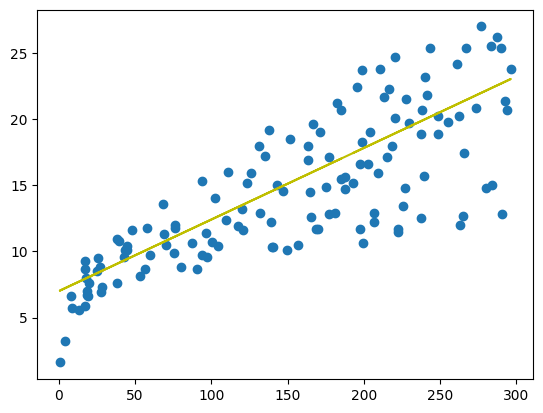

In [72]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [73]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

139    4.546924
153    3.535466
80     1.140072
175    6.189139
15     5.715329
         ...   
2      1.637255
47     4.262379
64     4.570715
104    1.848447
85    -1.373289
Name: Sales, Length: 134, dtype: float64

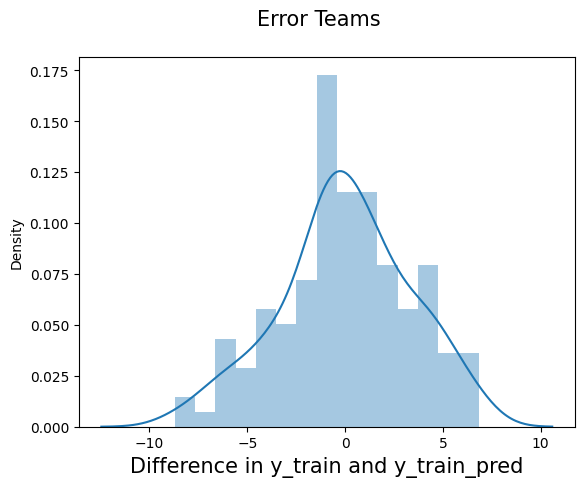

In [76]:
fig=plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Teams',fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

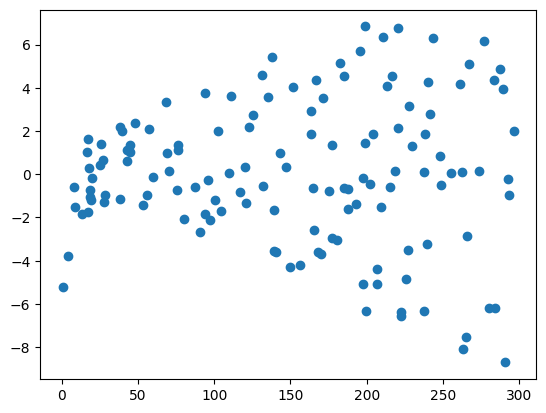

In [77]:
plt.scatter(x_train,res)
plt.show()

In [78]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [79]:
y_pred

array([11.72818063,  7.99689014, 18.35033526, 10.65992786, 11.26240217,
       19.64135164, 18.93255833, 11.63705006, 10.50804358, 14.37096711,
        7.1615266 , 10.5738601 , 17.59597666, 18.44146582, 13.34321681,
       15.52528764, 13.68748785, 18.13263445, 12.66480036, 18.54272201,
       17.45928081, 15.68729754, 13.59129447, 21.00324735, 11.3332815 ,
        7.06533322, 16.46697018, 17.17070068, 10.59411134, 17.74786094,
       17.66179318, 11.13076913, 17.91999646, 21.03868702, 12.50785327,
       21.27157625, 13.84443494, 16.33027433, 10.13845849, 20.80073498,
        8.66011817,  8.05764385, 12.22939876, 19.49453017, 10.75105843,
       17.85417994,  7.38429021, 12.35090618, 17.81367747, 10.28527997,
       18.66422944, 10.60423695, 10.17896097,  7.22734312, 16.90743459,
        7.23240593, 10.22452625,  9.94607174, 18.94774676, 18.94774676,
       12.89262678,  9.32334619, 16.59860322,  8.38672646, 13.94569112,
        7.45516954])

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.1391241648364008

In [83]:
r2 = r2_score(y_test,y_pred)
r2

0.50484540226075

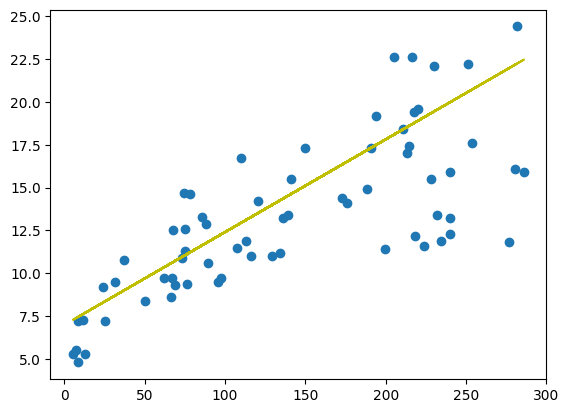

In [84]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541*x_test,"y")
plt.show()